# <center>Movie Success Predictor</center>

<b>Team</b> : 30<br>
<b>Team Members</b>:<br>
Sai Santhosh Balusu(sbalusu)<br>
Sameer Thummalapally(vthumma)<br>
Sruthi Talluri(stallur2)<br>
Sai Shruthi Kara(skara2)<br>

In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra

import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import random
from imblearn.over_sampling import SMOTE
import sklearn
from sklearn.model_selection import train_test_split,cross_validate,KFold,StratifiedKFold
from sklearn.model_selection import cross_val_score,cross_val_predict

In [2]:
data = pd.read_csv('rotten_tomatoes_movies.csv')
tag = pd.read_csv('tag.csv')

In [3]:
data.isnull().sum()

rotten_tomatoes_link                0
movie_title                         0
movie_info                         24
critics_consensus                8329
poster_image_url                    0
rating                              0
genre                              17
directors                         114
writers                          1349
cast                              284
in_theaters_date                  815
on_streaming_date                   2
runtime_in_minutes                155
studio_name                       416
tomatometer_status                  0
tomatometer_rating                  0
tomatometer_count                   0
audience_status                   252
audience_rating                   252
audience_count                    252
audience_top_critics_count          0
audience_fresh_critics_count        0
audience_rotten_critics_count       0
dtype: int64

In [4]:
data['rating'].value_counts()

R         6136
NR        4862
PG-13     2885
PG        2062
G          652
NC17        37
PG-13)       3
R)           1
Name: rating, dtype: int64

In [5]:

data=data.replace({'rating': {'PG-13)': 'PG-13', 'R)': 'R'}})


In [6]:
data['rating'].value_counts()

R        6137
NR       4862
PG-13    2888
PG       2062
G         652
NC17       37
Name: rating, dtype: int64

In [7]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data['tomatometer_status'] = label_encoder.fit_transform(data['tomatometer_status'])

In [8]:
data.head(5)

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,poster_image_url,rating,genre,directors,writers,cast,...,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,audience_top_critics_count,audience_fresh_critics_count,audience_rotten_critics_count
0,/m/0814255,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,Though it may seem like just another Harry Pot...,https://resizing.flixster.com/p1veUpQ4ktsSHtRu...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",...,20th Century Fox,2,49,144,Spilled,53.0,254287.0,38,71,73
1,/m/0878835,Please Give,Kate has a lot on her mind. There's the ethics...,Nicole Holofcener's newest might seem slight i...,https://resizing.flixster.com/0AbudQ4KsB4BeXSB...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",...,Sony Pictures Classics,0,86,140,Upright,64.0,11567.0,43,121,19
2,/m/10,10,Blake Edwards' 10 stars Dudley Moore as George...,NaN,https://resizing.flixster.com/mF0dxH6UTa0FdkMs...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",...,Waner Bros.,1,68,22,Spilled,53.0,14670.0,2,15,7
3,/m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),"A Puerto Rican youth is on trial for murder, a...",Sidney Lumet's feature debut is a superbly wri...,https://resizing.flixster.com/u-8xAyGaDVvROLiR...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",...,Criterion Collection,0,100,51,Upright,97.0,105000.0,6,51,0
4,/m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","This 1954 Disney version of Jules Verne's 20,0...","One of Disney's finest live-action adventures,...",https://resizing.flixster.com/FKExgYBHu07XLoil...,G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",...,Disney,1,89,27,Upright,74.0,68860.0,5,24,3


In [9]:
data.corr()

,runtime_in_minutes,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,audience_count,audience_top_critics_count,audience_fresh_critics_count,audience_rotten_critics_count
runtime_in_minutes,1.000000,-0.105393,0.071270,0.191975,0.168507,0.048799,0.164626,0.190409,0.101849
tomatometer_status,-0.105393,1.000000,-0.806840,-0.275054,-0.582228,-0.042049,-0.262116,-0.534741,0.296627
tomatometer_rating,0.071270,-0.806840,1.000000,0.079565,0.660111,0.014426,0.049651,0.344220,-0.406547
tomatometer_count,0.191975,-0.275054,0.079565,1.000000,0.141012,0.132686,0.928250,0.902671,0.684753
audience_rating,0.168507,-0.582228,0.660111,0.141012,1.000000,0.022812,0.127383,0.312270,-0.217062
audience_count,0.048799,-0.042049,0.014426,0.132686,0.022812,1.000000,0.129592,0.125137,0.081453
audience_top_critics_count,0.164626,-0.262116,0.049651,0.928250,0.127383,0.129592,1.000000,0.805213,0.691071
audience_fresh_critics_count,0.190409,-0.534741,0.344220,0.902671,0.312270,0.125137,0.805213,1.000000,0.304512
audience_rotten_critics_count,0.101849,0.296627,-0.406547,0.684753,-0.217062,0.081453,0.691071,0.304512,1.000000


In [10]:
data['audience_status'].value_counts()

Upright    8953
Spilled    7433
Name: audience_status, dtype: int64

In [11]:
x={'Upright':1,'Spilled':2}
data['audience_status']=data['audience_status'].str.strip().map(x)


In [12]:
data['audience_status'].nunique()

2

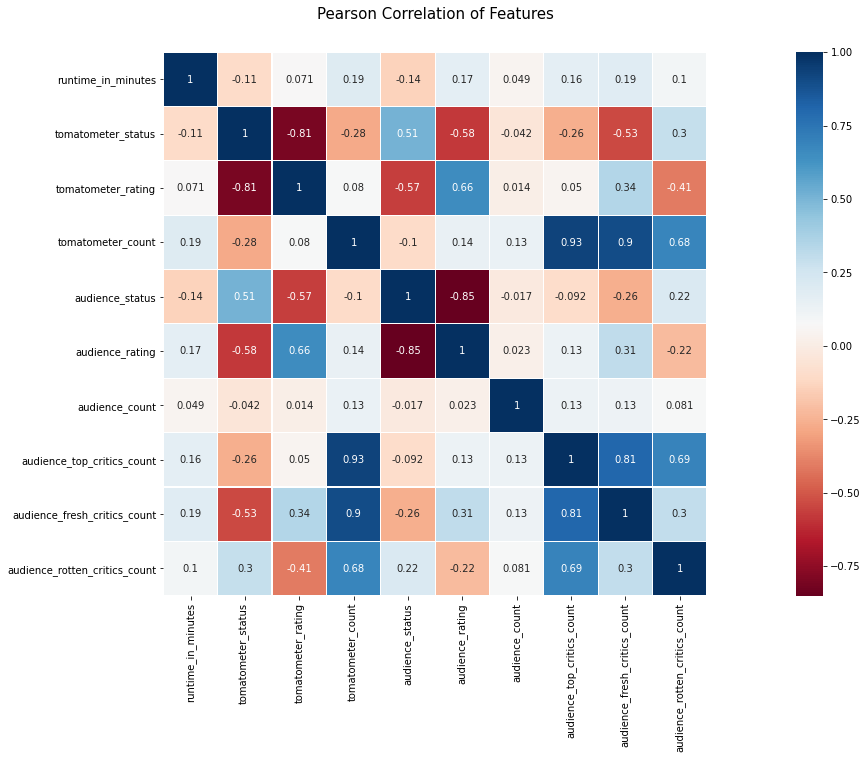

In [13]:
colormap = plt.cm.RdBu
plt.figure(figsize=(32,10))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns_plot=sns.heatmap(data.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)
sns_plot.figure.savefig("output.png")

In [14]:
data= data.drop(['movie_info','critics_consensus','poster_image_url','writers','on_streaming_date','in_theaters_date','studio_name','tomatometer_status','audience_status','audience_top_critics_count','audience_fresh_critics_count','audience_rotten_critics_count'],axis=1)

In [15]:
data.head()

,rotten_tomatoes_link,movie_title,rating,genre,directors,cast,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating,audience_count
0,/m/0814255,Percy Jackson & the Olympians: The Lightning T...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",83.0,49,144,53.0,254287.0
1,/m/0878835,Please Give,R,Comedy,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",90.0,86,140,64.0,11567.0
2,/m/10,10,R,"Comedy, Romance",Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",118.0,68,22,53.0,14670.0
3,/m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),NR,"Classics, Drama",Sidney Lumet,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",95.0,100,51,97.0,105000.0
4,/m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",127.0,89,27,74.0,68860.0


In [16]:
data['rating'].value_counts()

R        6137
NR       4862
PG-13    2888
PG       2062
G         652
NC17       37
Name: rating, dtype: int64

In [17]:
data = pd.get_dummies(data, prefix_sep= "__", 
                         columns = ['rating'])

In [18]:
data.head(5)

,rotten_tomatoes_link,movie_title,genre,directors,cast,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating,audience_count,rating__G,rating__NC17,rating__NR,rating__PG,rating__PG-13,rating__R
0,/m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",83.0,49,144,53.0,254287.0,0,0,0,1,0,0
1,/m/0878835,Please Give,Comedy,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",90.0,86,140,64.0,11567.0,0,0,0,0,0,1
2,/m/10,10,"Comedy, Romance",Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",118.0,68,22,53.0,14670.0,0,0,0,0,0,1
3,/m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),"Classics, Drama",Sidney Lumet,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",95.0,100,51,97.0,105000.0,0,0,1,0,0,0
4,/m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","Action & Adventure, Drama, Kids & Family",Richard Fleischer,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",127.0,89,27,74.0,68860.0,1,0,0,0,0,0


In [19]:
tag.head()

,Unnamed: 0,0
0,/m/0814255,20
1,/m/0878835,122
2,/m/10,18
3,/m/1000013-12_angry_men,47
4,/m/1000079-20000_leagues_under_the_sea,20


In [20]:
data.isnull().sum()

rotten_tomatoes_link      0
movie_title               0
genre                    17
directors               114
cast                    284
runtime_in_minutes      155
tomatometer_rating        0
tomatometer_count         0
audience_rating         252
audience_count          252
rating__G                 0
rating__NC17              0
rating__NR                0
rating__PG                0
rating__PG-13             0
rating__R                 0
dtype: int64

In [21]:
data = data.dropna(axis=0, subset=['genre'])

# Multi-Label Binarization

In [22]:
from sklearn.preprocessing import MultiLabelBinarizer
import json

## format genre column to be in the form of a list rather than string

genre_new=[] #declare a list
for cell in data['genre']:
    cell=cell.replace(" ","") #remove whitespace
    cell=cell.replace("&", "& ") #add whitespace back in for ampersands
    genre_new.append(cell.split(",")) #for each genre cell, create a list of items from the original string, using a comma as a delimeter
    
#add new genre column to the dataframe
data['genre_new'] = genre_new 

## MultiLabelBinarizer takes an iterable list and turns it into columns with binary values that represent the list.
## For example, [Comedy, Drama] -> Comedy and Drama columns with a value of 1, all other columns with a value of 0

#initialize MultiLabelBinarizer 
mlb = MultiLabelBinarizer() 

#transform the genre_new column to a series of columns with binary values
binary_labels=pd.DataFrame(mlb.fit_transform(data['genre_new']),columns=mlb.classes_) 

#order columns alphabetically
binary_labels=binary_labels.sort_index(axis=1) 

binary_labels.head()

,Action& Adventure,Animation,Anime& Manga,ArtHouse& International,Classics,Comedy,CultMovies,Documentary,Drama,Faith& Spirituality,...,Horror,Kids& Family,Musical& PerformingArts,Mystery& Suspense,Romance,ScienceFiction& Fantasy,SpecialInterest,Sports& Fitness,Television,Western
0,1,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0


In [23]:
data = data.merge(binary_labels, how='inner', left_index=True, right_index=True)
data= data.drop(columns=['genre','genre_new'])
data.head()

,rotten_tomatoes_link,movie_title,directors,cast,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating,audience_count,rating__G,...,Horror,Kids& Family,Musical& PerformingArts,Mystery& Suspense,Romance,ScienceFiction& Fantasy,SpecialInterest,Sports& Fitness,Television,Western
0,/m/0814255,Percy Jackson & the Olympians: The Lightning T...,Chris Columbus,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",83.0,49,144,53.0,254287.0,0,...,0,0,0,0,0,1,0,0,0,0
1,/m/0878835,Please Give,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",90.0,86,140,64.0,11567.0,0,...,0,0,0,0,0,0,0,0,0,0
2,/m/10,10,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",118.0,68,22,53.0,14670.0,0,...,0,0,0,0,1,0,0,0,0,0
3,/m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),Sidney Lumet,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",95.0,100,51,97.0,105000.0,0,...,0,0,0,0,0,0,0,0,0,0
4,/m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea",Richard Fleischer,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",127.0,89,27,74.0,68860.0,1,...,0,1,0,0,0,0,0,0,0,0


# Handling nominal data in Cast and Director features

In [24]:
data['cast'] = data['cast'].apply(lambda x:str(x).split(","))
data['cast'] = data['cast'].apply(lambda x:','.join(x))
data['directors'] = data['directors'].apply(lambda x:str(x).split(","))
data['directors'] = data['directors'].apply(lambda x:','.join(x))

In [25]:
data['cast']

0        Logan Lerman, Brandon T. Jackson, Alexandra Da...
1        Catherine Keener, Amanda Peet, Oliver Platt, R...
2        Dudley Moore, Bo Derek, Julie Andrews, Robert ...
3        Martin Balsam, John Fiedler, Lee J. Cobb, E.G....
4        James Mason, Kirk Douglas, Paul Lukas, Peter L...
                               ...                        
16616    Taylor Handley, Alison Folland, Dustin Seavey,...
16617    Steve Guttenberg, Kathleen Quinlan, Arnold Vos...
16618    Fred Astaire, Judy Garland, Gene Kelly, Willia...
16619    David Bowie, Mick Ronson, Trevor Bolder, Mick ...
16620    Hrithik Roshan, Abhay Deol, Farhan Akhtar, Kat...
Name: cast, Length: 16604, dtype: object

In [26]:
data['directors'] = data['directors'].apply(lambda x:str(x).replace(" ", "").lower())
data['cast'] = data['cast'].apply(lambda x:str(x).replace(" ", "").lower())

In [27]:
li = ','.join(data['directors']).split(',')
li=set(li)
director_dict = {i:0 for i in li}

In [28]:
li = ','.join(data['cast']).split(',')
li=set(li)
cast_dict = {i:0 for i in li}

In [29]:
 for x in data['directors']:
    lis=x.split(',')
    for y in lis:
        if y in director_dict:
            val = director_dict.get(y) + 1
            director_dict[y]=val

            
dir_li=list()
i=0
total = 0
for x in data['directors']:
    total=0
    directs=x.split(',')
    for y in directs:       
        if y in director_dict:
            total+=director_dict[y]*10
    dir_li.append(total)
    i=i+1
data['directors'] = dir_li

In [30]:
 for x in data['cast']:
    lis=x.split(',')
    for y in lis:
        if y in cast_dict:
            val = cast_dict.get(y) + 1
            cast_dict[y]=val

            
dir_li=list()
i=0
total = 0
for x in data['cast']:
    total=0
    directs=x.split(',')
    for y in directs:       
        if y in cast_dict:
            total+=cast_dict[y]*10
    dir_li.append(total)
#     data['directors'][i]=total
    i=i+1
data['cast'] = dir_li

In [31]:
len(data[data['cast']==0])

0

In [32]:
data.head()

,rotten_tomatoes_link,movie_title,directors,cast,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating,audience_count,rating__G,...,Horror,Kids& Family,Musical& PerformingArts,Mystery& Suspense,Romance,ScienceFiction& Fantasy,SpecialInterest,Sports& Fitness,Television,Western
0,/m/0814255,Percy Jackson & the Olympians: The Lightning T...,130,7150,83.0,49,144,53.0,254287.0,0,...,0,0,0,0,0,1,0,0,0,0
1,/m/0878835,Please Give,50,2600,90.0,86,140,64.0,11567.0,0,...,0,0,0,0,0,0,0,0,0,0
2,/m/10,10,270,3180,118.0,68,22,53.0,14670.0,0,...,0,0,0,0,1,0,0,0,0,0
3,/m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),300,2080,95.0,100,51,97.0,105000.0,0,...,0,0,0,0,0,0,0,0,0,0
4,/m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea",170,2410,127.0,89,27,74.0,68860.0,1,...,0,1,0,0,0,0,0,0,0,0


In [33]:
data['label']=tag['0']

In [34]:
data.head()

,rotten_tomatoes_link,movie_title,directors,cast,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating,audience_count,rating__G,...,Kids& Family,Musical& PerformingArts,Mystery& Suspense,Romance,ScienceFiction& Fantasy,SpecialInterest,Sports& Fitness,Television,Western,label
0,/m/0814255,Percy Jackson & the Olympians: The Lightning T...,130,7150,83.0,49,144,53.0,254287.0,0,...,0,0,0,0,1,0,0,0,0,20.0
1,/m/0878835,Please Give,50,2600,90.0,86,140,64.0,11567.0,0,...,0,0,0,0,0,0,0,0,0,122.0
2,/m/10,10,270,3180,118.0,68,22,53.0,14670.0,0,...,0,0,0,1,0,0,0,0,0,18.0
3,/m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),300,2080,95.0,100,51,97.0,105000.0,0,...,0,0,0,0,0,0,0,0,0,47.0
4,/m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea",170,2410,127.0,89,27,74.0,68860.0,1,...,1,0,0,0,0,0,0,0,0,20.0


In [35]:
data=data.drop(columns=['rotten_tomatoes_link','movie_title'])

In [36]:
data.fillna(data.mean(),inplace = True)

# Skewness

<Figure size 1440x1440 with 0 Axes>

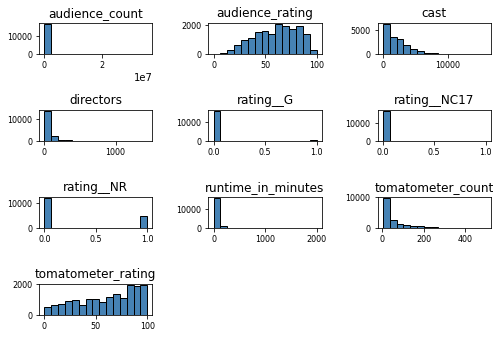

In [37]:
plt.figure(figsize=(20,20))
data.iloc[:,:10].hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.0,
           xlabelsize=8, ylabelsize=8, grid=False)    
plt.tight_layout(rect=(0, 0, 1.2, 1.2))   

runtime_in_minutes    27.756649
rating__NC17          21.114913
audience_count        17.973384
directors              6.679758
rating__G              4.744597
tomatometer_count      2.010689
cast                   1.334875
rating__NR             0.913524
tomatometer_rating     0.419065
audience_rating        0.309191
dtype: float64


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

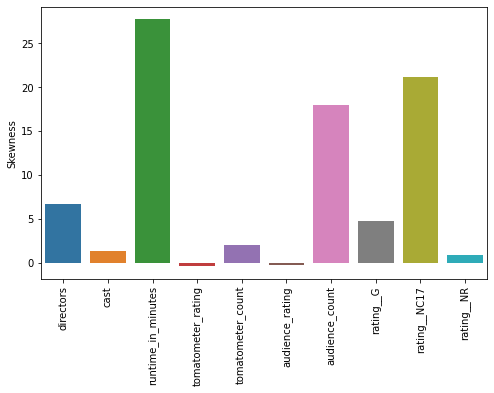

In [38]:
skew=data.iloc[:,:10].skew()
print(skew.abs().sort_values(ascending=False))
skew_df=pd.DataFrame(skew,index=None,columns=['Skewness'])
plt.figure(figsize=(8,5))
sns.barplot(x=skew_df.index,y='Skewness',data=skew_df)
plt.xticks(rotation=90)

In [39]:
data_copy=data.copy()

In [40]:
def remove_skew_n_power(col):
  print("Removing Skew by applying power of N :")
  power = 0
  min_skew = 99999
  for i in range(1,11):
    skew = abs((col**i).skew())
    print(i,skew)
    if(skew < min_skew) :
      min_skew = skew
      power = i
  return power, min_skew

In [41]:
def remove_skew_n_root(col):
  print("Removing Skew by applying root of N :")
  power = 0
  min_skew = 99999
  for i in range(1,11):
    skew = abs((col**(1/i)).skew())
    print(i,skew)
    if(skew < min_skew) :
      min_skew = skew
      power = 1/i
  return power, min_skew

<b>Directors</b>

In [42]:
data["directors"].skew()

6.67975798292568

In [43]:
print('Minimum Skewness (N, Skewness) :', remove_skew_n_power(data["directors"]))
print('\n\n')
print('Minimum Skewness (N, Skewness) :', remove_skew_n_root(data["directors"]))

Removing Skew by applying power of N :
1 6.67975798292568
2 11.41813952746434
3 12.1581086197349
4 12.842909118471557
5 14.25355733075244
6 17.121252872806295
7 9.130190666988765
8 1.4388987567822797
9 0.27618448984252075
10 0.6771401291565916
Minimum Skewness (N, Skewness) : (9, 0.27618448984252075)



Removing Skew by applying root of N :
1 6.67975798292568
2 2.356740433475564
3 1.4489172323884096
4 1.1058738481354484
5 0.9291561633195123
6 0.8218905267391573
7 0.7499590831222062
8 0.6983989065919766
9 0.6596383473509541
10 0.6294407268487788
Minimum Skewness (N, Skewness) : (0.1, 0.6294407268487788)


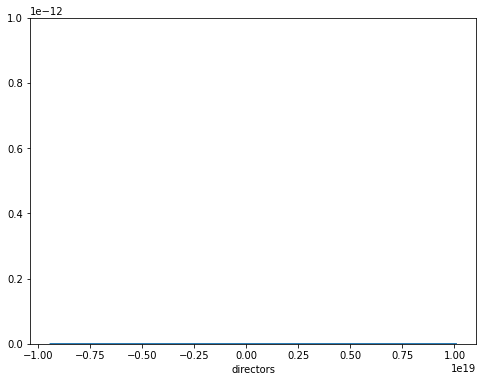

In [44]:
from scipy import stats
plt.figure(figsize=(8,6))
sns.distplot(data["directors"]**9)

In [45]:
data["directors"]=data["directors"]**9

cast

In [46]:
data["cast"].skew()

1.3348753694915416

In [47]:
print('Minimum Skewness (N, Skewness) :', remove_skew_n_power(data["cast"]))
print('\n\n')
print('Minimum Skewness (N, Skewness) :', remove_skew_n_root(data["cast"]))

Removing Skew by applying power of N :
1 1.3348753694915416
2 4.656917367838057
3 11.173853185562198
4 20.56244014901088
5 0.514842838648432
6 0.18494244576239627
7 0.03715251614592233
8 0.10202182055209488
9 0.00012776602130596342
10 0.0293323869143319
Minimum Skewness (N, Skewness) : (9, 0.00012776602130596342)



Removing Skew by applying root of N :
1 1.3348753694915416
2 0.24334411888606086
3 0.12845981298714887
4 0.3293505865002838
5 0.4575234118666766
6 0.5470034285283267
7 0.6132024946140723
8 0.6642320043108074
9 0.7048008682756572
10 0.7378411856190111
Minimum Skewness (N, Skewness) : (0.3333333333333333, 0.12845981298714887)


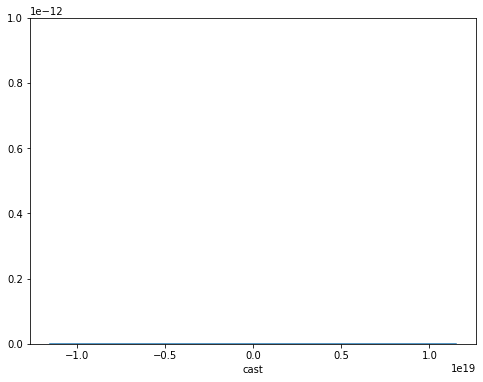

In [48]:
from scipy import stats
plt.figure(figsize=(8,6))
sns.distplot(data["cast"]**9)

In [49]:
data["cast"]=data["cast"]**9

runtime_in_minutes

In [50]:
data["runtime_in_minutes"].skew()

27.75664935979491

In [51]:
print('Minimum Skewness (N, Skewness) :', remove_skew_n_power(data["runtime_in_minutes"]))
print('\n\n')
print('Minimum Skewness (N, Skewness) :', remove_skew_n_root(data["runtime_in_minutes"]))

Removing Skew by applying power of N :
1 27.75664935979491
2 123.40277640145297
3 128.72824532927723
4 128.85103089721378
5 128.8562070895488
6 128.856491626474
7 128.85650828818203
8 128.85650927964866
9 128.85650933897085
10 128.85650934252945
Minimum Skewness (N, Skewness) : (1, 27.75664935979491)



Removing Skew by applying root of N :
1 27.75664935979491
2 2.684163318954417
3 0.33326843844970155
4 0.7364514366829015
5 1.4366073408081355
6 1.9498066586237994
7 2.346552646003817
8 2.663596911727888
9 2.923083394057524
10 3.1394662687378507
Minimum Skewness (N, Skewness) : (0.3333333333333333, 0.33326843844970155)


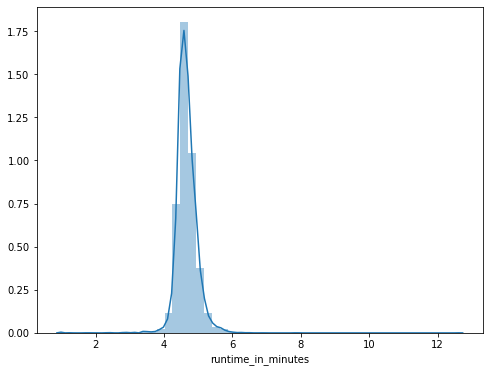

In [52]:
from scipy import stats
plt.figure(figsize=(8,6))
sns.distplot(data["runtime_in_minutes"]**(1/3))

In [53]:
data["runtime_in_minutes"]=data["runtime_in_minutes"]**(1/3)

audience_count

In [54]:
data["audience_count"].skew()

17.973383530483346

In [55]:
print('Minimum Skewness (N, Skewness) :', remove_skew_n_power(data["audience_count"]))
print('\n\n')
print('Minimum Skewness (N, Skewness) :', remove_skew_n_root(data["audience_count"]))

Removing Skew by applying power of N :
1 17.973383530483346
2 18.22962793925369
3 18.344917989299923
4 18.51305921071749
5 18.739971920213115
6 19.032220744022386
7 19.397405249196343
8 19.844159043422685
9 20.38210132596836
10 21.02173172102365
Minimum Skewness (N, Skewness) : (1, 17.973383530483346)



Removing Skew by applying root of N :
1 17.973383530483346
2 11.774875646655012
3 5.358530742938584
4 3.0000598297488663
5 2.0487888057679036
6 1.569427917394569
7 1.2854472486192707
8 1.0980106398071265
9 0.9648224870349464
10 0.8650896398955965
Minimum Skewness (N, Skewness) : (0.1, 0.8650896398955965)


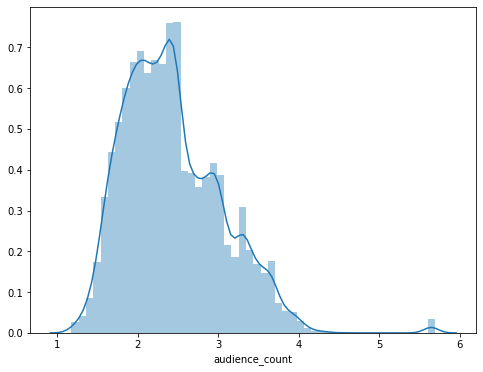

In [56]:
from scipy import stats
plt.figure(figsize=(8,6))
sns.distplot(data["audience_count"]**(1/10))

In [57]:
data["audience_count"]=data["audience_count"]**(1/10)

tomatometer_count 

In [58]:
data["tomatometer_count"].skew()

2.010688866976988

In [59]:
print('Minimum Skewness (N, Skewness) :', remove_skew_n_power(data["tomatometer_count"]))
print('\n\n')
print('Minimum Skewness (N, Skewness) :', remove_skew_n_root(data["tomatometer_count"]))

Removing Skew by applying power of N :
1 2.010688866976988
2 4.8432358803047775
3 9.008827355799514
4 13.914241765707272
5 19.0827211296708
6 24.249469758055053
7 29.202481848215808
8 0.8531969390813795
9 0.1751343113053768
10 0.023309991398489455
Minimum Skewness (N, Skewness) : (10, 0.023309991398489455)



Removing Skew by applying root of N :
1 2.010688866976988
2 1.0395093263151742
3 0.7486487323933328
4 0.6068846879312034
5 0.5228364433131846
6 0.4672061779584223
7 0.42766445653713997
8 0.3981141402295386
9 0.37519350509230776
10 0.3568968065098624
Minimum Skewness (N, Skewness) : (0.1, 0.3568968065098624)


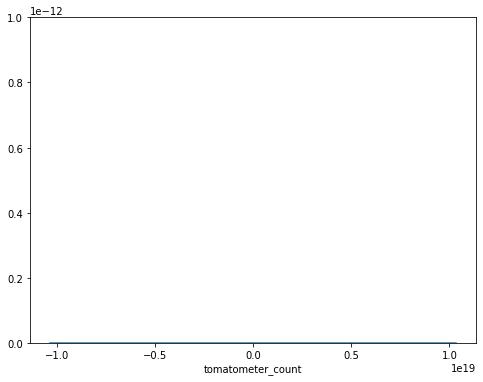

In [60]:
from scipy import stats
plt.figure(figsize=(8,6))
sns.distplot(data["tomatometer_count"]**(10))

In [61]:
data["tomatometer_count"]=data["tomatometer_count"]**(10)

In [ ]:
plt.figure(figsize=(20,20))
data.iloc[:,:10].hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.0,
           xlabelsize=8, ylabelsize=8, grid=False)    
plt.tight_layout(rect=(0, 0, 1.2, 1.2))

# Outlier Removal

-> Percentage of data loss=  0.0


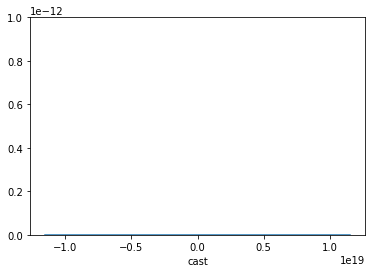

In [62]:
q1, q2, q3 = data['cast'].quantile([.25,.50,.75])
IQR = q3-q1
Min = q1 - IQR*1.5
Max = q3 + IQR*1.5
data_outliers = data[data['cast']<Min]
data_outliers = pd.concat([data_outliers, data[data['cast']>Max]])
no_outlier_data = data[data['cast']>Min]
no_outlier_data = no_outlier_data[no_outlier_data['cast']<Max]
print("-> Percentage of data loss= ", len(data_outliers['cast'])*100/len(data['cast']))
sns.distplot(no_outlier_data['cast'])

In [63]:
data = no_outlier_data.copy()

-> Percentage of data loss=  3.463020958805107


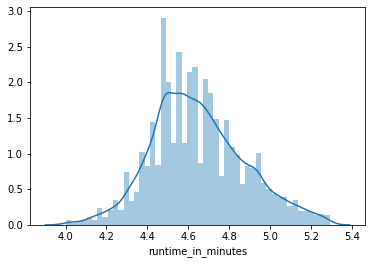

In [64]:
q1, q2, q3 = data['runtime_in_minutes'].quantile([.25,.50,.75])
IQR = q3-q1
Min = q1 - IQR*1.5
Max = q3 + IQR*1.5
data_outliers = data[data['runtime_in_minutes']<Min]
data_outliers = pd.concat([data_outliers, data[data['runtime_in_minutes']>Max]])
no_outlier_data = data[data['runtime_in_minutes']>Min]
no_outlier_data = no_outlier_data[no_outlier_data['runtime_in_minutes']<Max]
print("-> Percentage of data loss= ", len(data_outliers['runtime_in_minutes'])*100/len(data['runtime_in_minutes']))
sns.distplot(no_outlier_data['runtime_in_minutes'])

In [65]:
data = no_outlier_data.copy()

-> Percentage of data loss=  0.4179923887953085


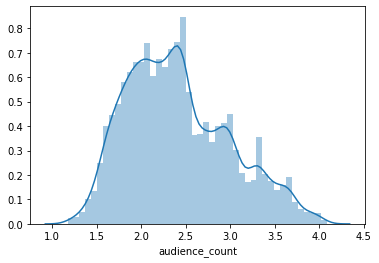

In [66]:
q1, q2, q3 = data['audience_count'].quantile([.25,.50,.75])
IQR = q3-q1
Min = q1 - IQR*1.5
Max = q3 + IQR*1.5
data_outliers = data[data['audience_count']<Min]
data_outliers = pd.concat([data_outliers, data[data['audience_count']>Max]])
no_outlier_data = data[data['audience_count']>Min]
no_outlier_data = no_outlier_data[no_outlier_data['audience_count']<Max]
print("-> Percentage of data loss= ", len(data_outliers['audience_count'])*100/len(data['audience_count']))
sns.distplot(no_outlier_data['audience_count'])

In [67]:
data = no_outlier_data.copy()

-> Percentage of data loss=  37.00037589274527


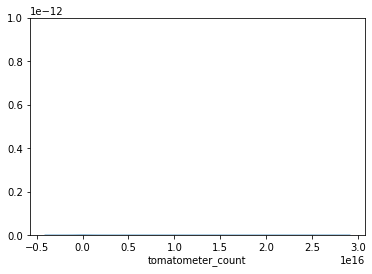

In [68]:
q1, q2, q3 = data['tomatometer_count'].quantile([.25,.50,.75])
IQR = q3-q1
Min = q1 - IQR*1.5
Max = q3 + IQR*1.5
data_outliers = data[data['tomatometer_count']<Min]
data_outliers = pd.concat([data_outliers, data[data['tomatometer_count']>Max]])
no_outlier_data = data[data['tomatometer_count']>Min]
no_outlier_data = no_outlier_data[no_outlier_data['tomatometer_count']<Max]
print("-> Percentage of data loss= ", len(data_outliers['tomatometer_count'])*100/len(data['tomatometer_count']))
sns.distplot(no_outlier_data['tomatometer_count'])

In [69]:
data = no_outlier_data.copy()

-> Percentage of data loss=  0.0


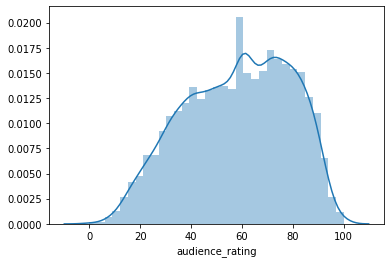

In [70]:
q1, q2, q3 = data['audience_rating'].quantile([.25,.50,.75])
IQR = q3-q1
Min = q1 - IQR*1.5
Max = q3 + IQR*1.5
data_outliers = data[data['audience_rating']<Min]
data_outliers = pd.concat([data_outliers, data[data['audience_rating']>Max]])
no_outlier_data = data[data['audience_rating']>Min]
no_outlier_data = no_outlier_data[no_outlier_data['audience_rating']<Max]
print("-> Percentage of data loss= ", len(data_outliers['audience_rating'])*100/len(data['audience_rating']))
sns.distplot(no_outlier_data['audience_rating'])

In [71]:
data = no_outlier_data.copy()

-> Percentage of data loss=  0.0


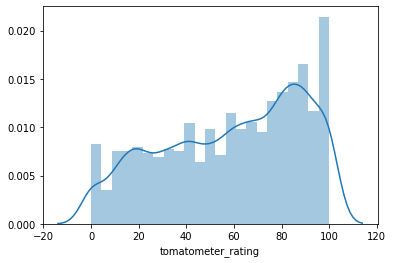

In [72]:
q1, q2, q3 = data['tomatometer_rating'].quantile([.25,.50,.75])
IQR = q3-q1
Min = q1 - IQR*1.5
Max = q3 + IQR*1.5
data_outliers = data[data['tomatometer_rating']<Min]
data_outliers = pd.concat([data_outliers, data[data['tomatometer_rating']>Max]])
no_outlier_data = data[data['tomatometer_rating']>Min]
no_outlier_data = no_outlier_data[no_outlier_data['tomatometer_rating']<Max]
print("-> Percentage of data loss= ", len(data_outliers['tomatometer_rating'])*100/len(data['tomatometer_rating']))
sns.distplot(no_outlier_data['tomatometer_rating'])

In [73]:
data = no_outlier_data.copy()

In [74]:
data.isnull().sum()

directors                  0
cast                       0
runtime_in_minutes         0
tomatometer_rating         0
tomatometer_count          0
audience_rating            0
audience_count             0
rating__G                  0
rating__NC17               0
rating__NR                 0
rating__PG                 0
rating__PG-13              0
rating__R                  0
Action& Adventure          0
Animation                  0
Anime& Manga               0
ArtHouse& International    0
Classics                   0
Comedy                     0
CultMovies                 0
Documentary                0
Drama                      0
Faith& Spirituality        0
Gay& Lesbian               0
Horror                     0
Kids& Family               0
Musical& PerformingArts    0
Mystery& Suspense          0
Romance                    0
ScienceFiction& Fantasy    0
SpecialInterest            0
Sports& Fitness            0
Television                 0
Western                    0
label         

# Normalization

In [75]:
from sklearn.preprocessing import MinMaxScaler

In [76]:
mms = MinMaxScaler()

In [77]:
data[["runtime_in_minutes","tomatometer_rating","tomatometer_count","audience_rating","audience_count"]]=mms.fit_transform(data[["runtime_in_minutes","tomatometer_rating","tomatometer_count","audience_rating","audience_count"]])

In [78]:
data['label'].describe()

count    10056.000000
mean        23.358137
std         44.500553
min       -156.000000
25%          3.000000
50%         12.000000
75%         31.000000
max        412.000000
Name: label, dtype: float64

In [79]:
temp=data['label'].mean()
temp

23.358137453725387

In [80]:
data['label']=data['label'].apply(lambda x: 1 if x>temp else 0)

In [81]:
data[data['label']==1].count()

directors                  3209
cast                       3209
runtime_in_minutes         3209
tomatometer_rating         3209
tomatometer_count          3209
audience_rating            3209
audience_count             3209
rating__G                  3209
rating__NC17               3209
rating__NR                 3209
rating__PG                 3209
rating__PG-13              3209
rating__R                  3209
Action& Adventure          3209
Animation                  3209
Anime& Manga               3209
ArtHouse& International    3209
Classics                   3209
Comedy                     3209
CultMovies                 3209
Documentary                3209
Drama                      3209
Faith& Spirituality        3209
Gay& Lesbian               3209
Horror                     3209
Kids& Family               3209
Musical& PerformingArts    3209
Mystery& Suspense          3209
Romance                    3209
ScienceFiction& Fantasy    3209
SpecialInterest            3209
Sports& 

# Successful movies - Genre and Rating count

Hit Genre:Drama
                      Genre  Count
0         Action& Adventure    613
1                 Animation    116
2              Anime& Manga      4
3   ArtHouse& International    477
4                  Classics    321
5                    Comedy   1035
6                CultMovies     12
7               Documentary    383
8                     Drama   1748
9       Faith& Spirituality     14
10             Gay& Lesbian     10
11                   Horror    337
12             Kids& Family    226
13  Musical& PerformingArts    182
14        Mystery& Suspense    632
15                  Romance    346
16  ScienceFiction& Fantasy    335
17          SpecialInterest    260
18          Sports& Fitness     37
19               Television     51
20                  Western     48


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 <a list of 21 Text major ticklabel objects>)

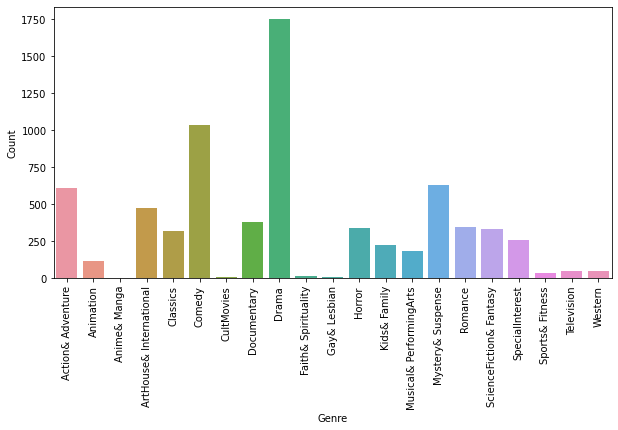

In [82]:
dfr=data[data.label==1]
col = ['Action& Adventure','Animation','Anime& Manga','ArtHouse& International','Classics','Comedy','CultMovies','Documentary','Drama','Faith& Spirituality','Gay& Lesbian','Horror','Kids& Family','Musical& PerformingArts','Mystery& Suspense',
       'Romance','ScienceFiction& Fantasy','SpecialInterest','Sports& Fitness','Television','Western']

# dfr.loc[col]
l = dict()
for i in col:    
    l[i] = sum(dfr[i])
max_key = max(l, key=l.get)
print("Hit Genre:"+ str(max_key))
df = pd.DataFrame(list(l.items()),columns = ['Genre','Count'])
print (df)
plt.figure(figsize=(10,5))
sns.barplot(x='Genre',y = 'Count',data=df)
plt.xticks(rotation=90)

A Movie is a success if it is rating__R Rated.


<BarContainer object of 5 artists>

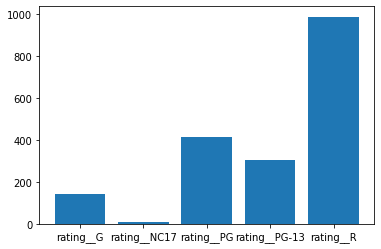

In [83]:
col = ['rating__G','rating__NC17', 'rating__PG', 'rating__PG-13','rating__R']
l = dict()
for i in col:    
    l[i] = sum(dfr[i])
max_key = max(l, key=l.get)
print("A Movie is a success if it is "+ str(max_key)+" Rated.")
plt.bar(l.keys(), l.values())

In [84]:
X = data.drop('label', axis = 1).values
y = data['label'].values.reshape(-1,1)

In [85]:
data.shape

(10056, 35)

# Data Preparation

In [88]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 22)
sm = SMOTE(random_state=12)
X_train, y_train = sm.fit_sample(X_train, y_train)
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
classifier_nb = GaussianNB()

In [89]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
classifier_knn = KNeighborsClassifier()

In [90]:
# Fitting Logistic Regression to the Training set
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
classifier_lr = LogisticRegression()

In [91]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
clf = RandomForestClassifier()

In [98]:
from sklearn.svm import SVC
classifier_svm = SVC()

# Cross Validation

In [92]:
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
np.mean(cross_val_score(classifier_nb, X_train, y_train.ravel(), cv=cv))

0.49757360077644774

In [93]:
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
np.mean(cross_val_score(classifier_knn, X_train, y_train.ravel(), cv=cv))

0.6027822711096732

In [94]:
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
np.mean(cross_val_score(clf, X_train, y_train.ravel(), cv=cv))

0.7559365901002912

In [95]:
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
np.mean(cross_val_score(classifier_lr, X_train, y_train.ravel(), cv=cv))

0.494208993853122

In [96]:
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
np.mean(cross_val_score(classifier_lr, X_train, y_train.ravel(), cv=cv))

0.494208993853122

In [99]:
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
np.mean(cross_val_score(classifier_svm, X_train, y_train.ravel(), cv=cv))

0.5114849563248139

# Machine Learning Models

# KNN

In [100]:
classifier_knn = classifier_knn.fit(X_train, y_train.ravel())
y_pred_knn_train = classifier_knn.predict(X_train)
accuracy_knn_train = accuracy_score(y_train, y_pred_knn_train)
print("Training set: ", accuracy_knn_train)

y_pred_knn_test = classifier_knn.predict(X_test)
accuracy_knn_test = accuracy_score(y_test, y_pred_knn_test)
print("Test set: ", accuracy_knn_test)

from sklearn.metrics import f1_score
fscore_knn_test =f1_score(y_test, y_pred_knn_test, average='macro')
print("F score: ", fscore_knn_test)
from sklearn.metrics import recall_score
rscore_knn_test =recall_score(y_test, y_pred_knn_test, average='macro')
print("Recall score: ", rscore_knn_test)
from sklearn.metrics import precision_score
pscore_knn_test =precision_score(y_test, y_pred_knn_test, average='macro')
print("Precision score: ", pscore_knn_test)

Training set:  0.7589788390603767
Test set:  0.545346062052506
F score:  0.5025984818835016
Recall score:  0.5044964132490658
Precision score:  0.5041830819214818


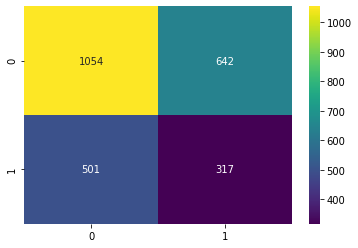

In [101]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred_knn_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.show()

# Naive Bayes

In [102]:
classifier_nb.fit(X_train, y_train.ravel())

GaussianNB(priors=None, var_smoothing=1e-09)

In [103]:
from sklearn.metrics import accuracy_score
y_pred_nb_train = classifier_nb.predict(X_train)
accuracy_nb_train = accuracy_score(y_train, y_pred_nb_train)
print("Training set: ", accuracy_nb_train)

y_pred_nb_test = classifier_nb.predict(X_test)
accuracy_nb_test = accuracy_score(y_test, y_pred_nb_test)
print("Test set: ", accuracy_nb_test)
from sklearn.metrics import f1_score
fscore_knn_test =f1_score(y_test, y_pred_nb_test, average='macro')
print("F score: ", fscore_knn_test)

from sklearn.metrics import recall_score
rscore_knn_test =recall_score(y_test, y_pred_nb_test, average='macro')
print("Recall score: ", rscore_knn_test)
from sklearn.metrics import precision_score
pscore_knn_test =precision_score(y_test, y_pred_nb_test, average='macro')
print("Precision score: ", pscore_knn_test)

Training set:  0.5080566880217433
Test set:  0.5918854415274463
F score:  0.5076230348742297
Recall score:  0.5095608248373852
Precision score:  0.5108824069941453


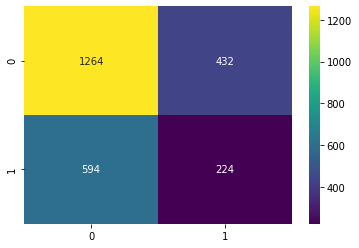

In [104]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred_nb_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.show()

# Random Forest

In [105]:
clf.fit(X_train, y_train.ravel())

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [106]:
y_pred_rf_train = clf.predict(X_train)
accuracy_rf_train = accuracy_score(y_train, y_pred_rf_train)
print("Training set: ", accuracy_rf_train)

y_pred_rf_test = clf.predict(X_test)
accuracy_rf_test = accuracy_score(y_test, y_pred_rf_test)
print("Test set: ", accuracy_rf_test)
from sklearn.metrics import f1_score
fscore_knn_test =f1_score(y_test, y_pred_rf_test, average='macro')
print("F score: ", fscore_knn_test)

from sklearn.metrics import recall_score
rscore_knn_test =recall_score(y_test, y_pred_rf_test, average='macro')
print("Recall score: ", rscore_knn_test)
from sklearn.metrics import precision_score
pscore_knn_test =precision_score(y_test, y_pred_rf_test, average='macro')
print("Precision score: ", pscore_knn_test)
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_rf_test).ravel()
specificity = tn / (tn+fp)
print("Specificity score: ", specificity)

Training set:  1.0
Test set:  0.6646778042959427
F score:  0.48865588259918824
Recall score:  0.5236404080361674
Precision score:  0.5647198931234744
Specificity score:  0.9274764150943396


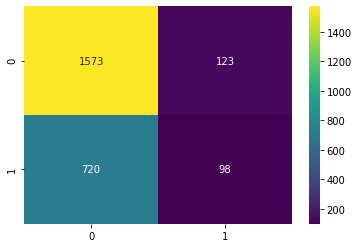

In [107]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred_rf_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.show()


# Logistic Regression

In [108]:
classifier_lr.fit(X_train, y_train.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [109]:
y_pred_lr_train = classifier_lr.predict(X_train)
accuracy_lr_train = accuracy_score(y_train, y_pred_lr_train)
print("Training set: ", accuracy_lr_train)

y_pred_lr_test = classifier_lr.predict(X_test)
accuracy_lr_test = accuracy_score(y_test, y_pred_lr_test)
print("Test set: ", accuracy_lr_test)
from sklearn.metrics import f1_score
fscore_knn_test =f1_score(y_test, y_pred_lr_test, average='macro')
print("F score: ", fscore_knn_test)
from sklearn.metrics import recall_score
rscore_knn_test =recall_score(y_test, y_pred_lr_test, average='macro')
print("Recall score: ", rscore_knn_test)
from sklearn.metrics import precision_score
pscore_knn_test =precision_score(y_test, y_pred_lr_test, average='macro')
print("Precision score: ", pscore_knn_test)

Training set:  0.5044651523975927
Test set:  0.5230708035003978
F score:  0.5004473836549762
Recall score:  0.5110867797665729
Precision score:  0.5097916201149326


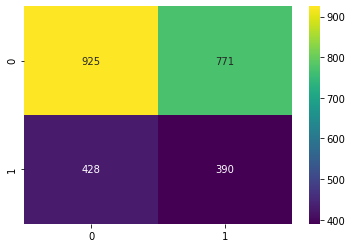

In [110]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred_lr_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.show()

# SVM

In [111]:
classifier_svm.fit(X_train, y_train.ravel())

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [112]:
y_pred_svm_train = classifier_svm.predict(X_train)
accuracy_svm_train = accuracy_score(y_train, y_pred_svm_train)
print("Training set: ", accuracy_svm_train)

y_pred_svm_test = classifier_svm.predict(X_test)
accuracy_svm_test = accuracy_score(y_test, y_pred_svm_test)
print("Test set: ", accuracy_svm_test)
from sklearn.metrics import f1_score
fscore_knn_test =f1_score(y_test, y_pred_svm_test, average='macro')
print("F score: ", fscore_knn_test)
from sklearn.metrics import recall_score
rscore_knn_test =recall_score(y_test, y_pred_svm_test, average='macro')
print("Recall score: ", rscore_knn_test)
from sklearn.metrics import precision_score
pscore_knn_test =precision_score(y_test, y_pred_svm_test, average='macro')
print("Precision score: ", pscore_knn_test)

Training set:  0.5254319549602019
Test set:  0.4343675417661098
F score:  0.4338225232621784
Recall score:  0.507048801725331
Precision score:  0.5074491910173985


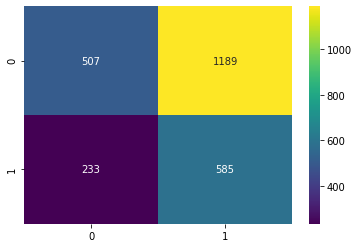

In [113]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred_svm_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.show()